In [1]:
# Import libraries
import pandas as pd
import numpy as np
import random

# SOM and SKlearn libraries
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set seed
random.seed(2023)
np.random.seed(2023)

In [3]:
# Read clusters file and save locally
df = pd.read_csv('data/cluster_new.csv', index_col=0)
df

,Cluster,Companies Name,Companies,ATR,CHG
0,0,IBM,IBM,2.475031,0.000528
1,1,Visa,V,2.207251,0.003852
2,1,Microsoft,MSFT,2.349957,0.003942
3,2,Walmart,WMT,1.475318,0.001789
4,2,Procter & Gamble,PG,1.412884,0.001495
5,2,JPMorgan Chase,JPM,1.827873,0.002304
6,2,Johnson & Johnson,JNJ,1.684044,0.001494
7,3,Boeing,BA,4.588926,0.003338
8,4,Goldman Sachs,GS,4.834159,0.001728
9,5,Verizon,VZ,0.757934,0.000529


In [4]:
# Define feature matrix
X = df[['ATR', 'CHG']]

# Transform feature matrix
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 
X

array([[0.43693632, 0.02199431],
       [0.37302405, 0.70623402],
       [0.4070843 , 0.72479388],
       [0.19833038, 0.28154701],
       [0.183429  , 0.22104484],
       [0.28247631, 0.38770848],
       [0.24814788, 0.22089921],
       [0.94146917, 0.60042429],
       [1.        , 0.26892143],
       [0.02710908, 0.02219653],
       [0.10639782, 0.31875618],
       [0.05470176, 0.17020302],
       [0.        , 0.20707937],
       [0.01153556, 0.24909861],
       [0.39168035, 0.24678558],
       [0.64261806, 0.41609195],
       [0.5943982 , 0.71527342],
       [0.56827876, 0.8759968 ],
       [0.8555854 , 0.8305866 ],
       [0.56066244, 0.45299987],
       [0.20038151, 0.6010897 ],
       [0.1603264 , 1.        ],
       [0.33653955, 0.47595929],
       [0.37510105, 0.48666662],
       [0.38617588, 0.42398968],
       [0.31634194, 0.334725  ],
       [0.3061748 , 0.37733042],
       [0.14304638, 0.        ],
       [0.44942818, 0.0409394 ]])

In [5]:
# Initialize a 15x15 SOM - Thumb rule is 5 * sqrt(n) > 5x5 SOM
som = MiniSom(15, 15, 2, learning_rate=0.5, sigma=5, random_seed=42)

# Initialize with random weights
som.random_weights_init(X)

# Trains SOM with 10000 iterations
som.train_batch(X, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.02863766658902161


Text(0.5, 1.0, 'Self Organizing Maps')

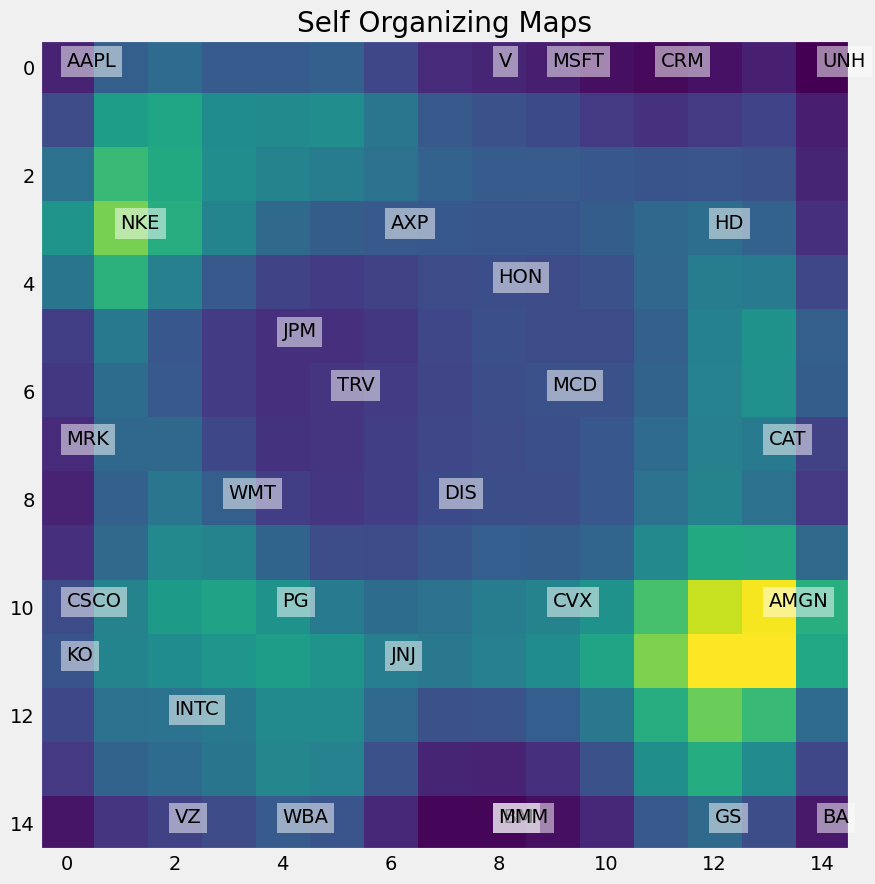

In [6]:
# Plot SOM
plt.figure(figsize=(20, 10))
for ix in range(len(X)):
    winner = som.winner(X[ix])
    plt.text(winner[0], winner[1], df.Companies[ix], bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.imshow(som.distance_map())
plt.grid(False)
plt.title('Self Organizing Maps')

In [7]:
# List of the corrsponding companies
for ix in range(len(X)):
    winner = som.winner(X[ix])
    print(winner[0], winner[1], df['Companies Name'][ix])

8 14 IBM
8 0 Visa
9 0 Microsoft
3 8 Walmart
4 10 Procter & Gamble
4 5 JPMorgan Chase
6 11 Johnson & Johnson
14 14 Boeing
12 14 Goldman Sachs
2 14 Verizon
0 7 Merck
2 12 Intel
0 11 Coca-Cola
0 10 Cisco
9 10 Chevron
13 10 Amgen
12 3 Home Depot
11 0 Salesforce
14 0 UnitedHealth Group
13 7 Caterpillar
1 3 Nike
0 0 Apple
6 3 American Express
8 4 Honeywell
9 6 McDonald's
7 8 Disney
5 6 Travelers
4 14 Walgreens Boots Alliance
8 14 3M
